<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/Finger_1_Real_or_Not_Google_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# levanto las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Replico lo que hizo martin en un ejercicio
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)


In [0]:
# Replico lo que hizo martin en un ejercicio
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [0]:
# Esto pareceria que sirve pero a mi no me funco
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [0]:
import warnings
warnings.filterwarnings('ignore')

**Quiero hacerme el sofisticado y levantar el dataset directamente desde Kaggle**
(Si, un banana barbaro. Que le vamo'a hacer)

In [0]:
# instalo dependencias
!pip install -q kaggle

In [9]:
#subo el achivo json de kaggle al que quiero conectarme
from google.colab import files
files.upload()

{}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
# Cambio los permisos
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
# Descargo el dataset 'Real or Not? NLP with Disaster Tweets'
!kaggle competitions download -c nlp-getting-started

  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 39.9MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 58.2MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 59.9MB/s]


In [13]:
# Cargo el dataset 'train'
finger=pd.read_csv('train.csv', sep=",")

FileNotFoundError: ignored

In [13]:
# Me fijo un poco los datos que tiene
finger.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
finger_short=pd.read_csv('train.csv', sep=",", usecols=['text','target'])

In [15]:
finger_short.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [17]:
# Consulto la longitud del DF
print(len(finger_short))

7613


In [16]:
# Me fijo el tipo de datos que tiene la estructura del DF

finger_short.dtypes

text      object
target     int64
dtype: object

In [16]:
# Creo una columna con el calculo de las palabras que tiene la columna 'text'
finger_short['text_counted']=finger_short['text'].str.len()
finger_short

,text,target,text_counted
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,83
7609,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,Police investigating after an e-bike collided ...,1,137


In [21]:
# Reviso el tipo
type(finger_short['text_counted'])

pandas.core.series.Series

In [22]:
# Transformo en dataframe
type(finger_short['text_counted'].to_frame().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   text_counted  7613 non-null   int64
dtypes: int64(1)
memory usage: 59.6 KB


NoneType

In [30]:
finger_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          7613 non-null   object
 1   target        7613 non-null   int64 
 2   text_counted  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB


Ejecuto un calculo basico de **estadistica**

In [60]:
finger_short.text_counted.min(),finger_short.text_counted.max(),finger_short.text_counted.mean()

(7, 157, 101.03743596479706)

In [61]:
# Hago un .describe() para verificarlo
finger_short.text_counted.describe()

count               7,613.00
mean                  101.04
std                    33.78
min                     7.00
25%                    78.00
50%                   107.00
75%                   133.00
max                   157.00
Name: text_counted, dtype: float64

In [26]:
#Calculo el promedio y lo asigno a la variable 'finger_short_mean'
finger_short_mean=np.round(finger_short['text_counted'].mean(), decimals=2)
finger_short_mean

101.04

In [0]:
# Hago lo mismo con el minimo y el maximo
#finger_short['text_counted'].min()

In [0]:
#finger_short['text_counted'].max()

In [18]:
finger_short.describe()

,target,text_counted
count,"7,613.00","7,613.00"
mean,0.43,101.04
std,0.50,33.78
min,0.00,7.00
25%,0.00,78.00
50%,0.00,107.00
75%,1.00,133.00
max,1.00,157.00


In [19]:
# Cuento las cantidad de registros reales y fakes de la clumna 'target
finger_short_counts=finger_short['target'].value_counts()
finger_short_counts

0    4342
1    3271
Name: target, dtype: int64

In [21]:
# Asigno a variables para que se puedan operar alfabeticamente
tweets_verdaderos=finger_short['target']==1
tweets_verdaderos.head()

0    True
1    True
2    True
3    True
4    True
Name: target, dtype: bool

In [100]:
# Verifico cantidad de tweets verdaderos
tweets_verdaderos.sum()

3271

In [22]:
# Aplico la misma accion para tweets fakes
# verifico cantidad de tweets fakes
tweets_fake=finger_short['target']==0
tweets_fake.head()
tweets_fake.sum()

4342

In [23]:
# Quiero los registros cuyo text_counted sea mayor o igual al promedio mas a delante saber su distribucion
tweets_mayor_promedio=finger_short['text_counted']>=(finger_short_mean)
tweets_mayor_promedio.head()

0    False
1    False
2     True
3    False
4    False
Name: text_counted, dtype: bool

In [24]:
tweets_mayor_promedio.sum()

4141

In [111]:
finger_short.head()

,text,target,text_counted
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [110]:
finger_short['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [0]:
#tweets_verdaderos=finger_short_counts['target'].value_counts()
#tweets_verdaderos

In [67]:
#finger_short.loc[:,['target','text_counted']].groupby('target').filter( lambda x: x.mean() > 101)

finger_short_up_mean=finger_short.loc['text_counted']>=(finger_short_mean)

KeyError: ignored

In [0]:
#finger_target_1.head()
#quiero calcular los valores que son mayores o iguales al promedio
#finger_target_1>=finger_short_mean.value_counts()

In [0]:
finger_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [0]:
# Cuento las cantidad de registros reales y fakes
finger_short['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

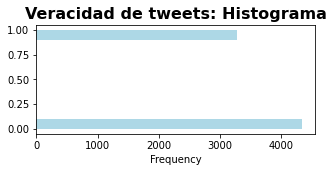

In [0]:
# analizo al distribucion de registros de la columna "target"
finger_graph1=plt.figure()
ax=finger_graph1.add_subplot(111)

plt.title('Veracidad de tweets: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('veracidad')
finger_short['target'].plot.hist(orientation='horizontal',color='lightblue', figsize=(5,2))

plt.show()

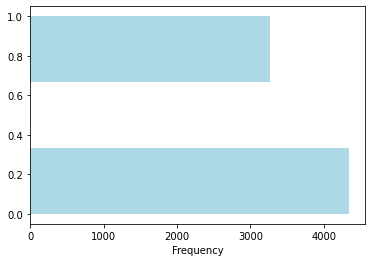

In [0]:
finger_short["target"].plot(kind='hist', bins=3, color="lightblue", orientation="horizontal")

In [0]:
#print(len(finger_short['text'].mean()))
len(finger_short['text'])

7613

In [0]:
finger_short['text_counted']=finger_short['text'].str.len()

In [0]:
#Elimine la columna 'Text_Counted' que habia creado antes. Lo corregi porque quiero todos los nombres de columna en minuscula
#finger_short.drop(['Text_Counted'], axis='columns', inplace=True)

In [0]:
finger_short.head()

,text,target,text_counted
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [0]:
finger_short['text_counted']

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text_counted, Length: 7613, dtype: int64

In [0]:
finger_short['text_counted'].mean()


101.03743596479706

In [0]:
finger_short['text_counted'].min()

7

In [0]:
finger_short['text_counted'].max()

157

In [0]:
# Chequeo cant de registros para verificar faltantes, Nan, Nulls valuies
finger_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          7613 non-null   object
 1   target        7613 non-null   int64 
 2   text_counted  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB


In [0]:
finger_short['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [0]:
finger_target_1=finger_short.groupby('target').filter(lambda x: len(x)>=1)

In [0]:
finger_target_1.head()

,text,target,text_counted
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [0]:
data=finger_short.filter(finger_short['text_counted']>mean)

NameError: ignored